# Evaluation Metrics
### Project Title - An AI Perspective on the Cryptocurrency Market: Predicting Pump-and-Dump Schemes
### Team Members - Cyrena Burke and Daniel Olaes

In [259]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
import pickle

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "evaluation"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Unsupervised Modeling
Evaluation metrics comparing the ability of the unsupervised models at clustering outlier data.

### ML Techniques used:
- K-Means Clustering & Mini-Batch K-Means Clustering
- Hierachical Density-Based Spatial Clustering of Applications with Noise (HDBSCAN)

In [260]:
# Reading in processed data
CRYPTO_FILE = "processed_crypto_data.csv"
CRYPTO_PATH = os.path.join(".", CRYPTO_FILE)
crypto_data = pd.read_csv(CRYPTO_PATH)
crypto_data = crypto_data.drop(["Unix Timestamp"], axis=1)
crypto_data.head()

,Volume Currency,Volume USD,Price Range
0,293.24,258092.72,9.95000
1,6185590.00,78674.57,0.00057
2,308.89,2309992.42,35.93000
3,184.91,1733771.37,110.04000
4,126.07,109158.24,5.54000


In [261]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into training and testing sets (80% train, 20% test) from K-Means Clustering
X_train, X_test = train_test_split(crypto_data, test_size=0.2, random_state=42)

# Select features to scale
features_to_scale = ["Price Range", "Volume Currency", "Volume USD"]

# Fit scaler to the training set
scaler = StandardScaler()
scaler.fit(X_train[features_to_scale])

# Scale training and testing set
X_train_scaled = X_train.copy()
X_train_scaled[features_to_scale] = scaler.transform(X_train[features_to_scale])

X_test_scaled = X_test.copy()
X_test_scaled[features_to_scale] = scaler.transform(X_test[features_to_scale])

# Scale entire dataset separately for unsupervised clustering or visualization
crypto_data_scaled = crypto_data.copy()
crypto_data_scaled[features_to_scale] = scaler.transform(crypto_data[features_to_scale])

## Evaluation (Visualization)
### K-Means Clustering

In [262]:
# Reading in K-Means Clustering model
kMeans_model = pickle.load(open('finalized_model_M3.sav', 'rb'))
kMeans_predictions = kMeans_model.predict(X_test_scaled)

Saving figure kMeans_Clustering_Predictions


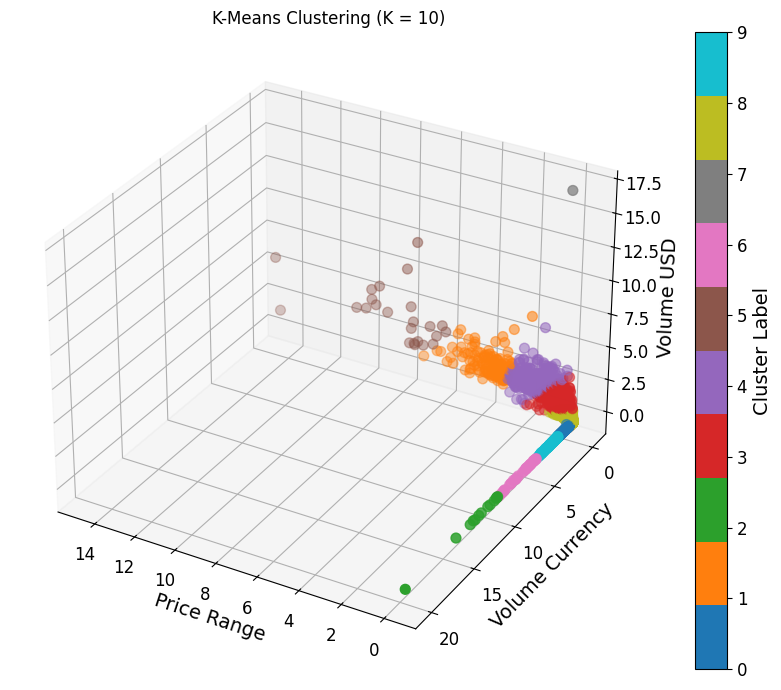

In [263]:
import matplotlib.pyplot as plt

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Extract feature values
x = X_test_scaled["Price Range"]
y = X_test_scaled["Volume Currency"]
z = X_test_scaled["Volume USD"]

# Plot the points colored by cluster
sc = ax.scatter(x, y, z, c=kMeans_predictions, cmap='tab10', s=50)

# Set labels
ax.set_title("K-Means Clustering (K = 10)")
ax.set_xlabel("Price Range")
ax.set_ylabel("Volume Currency")
ax.set_zlabel("Volume USD")
plt.colorbar(sc, label="Cluster Label")

# Change viewing angle here
ax.view_init(elev=30, azim=120)

save_fig("kMeans_Clustering_Predictions") 
plt.show()


### Mini-Batch K-Means Clustering

In [264]:
# Reading in Mini-Batch K-Means Clustering model
mbkMeans_model = pickle.load(open('finalized_model_M3_MiniBatch.sav', 'rb'))
mbkMeans_predictions = mbkMeans_model.predict(X_test_scaled)

Saving figure mbkMeans_Clustering_Predictions


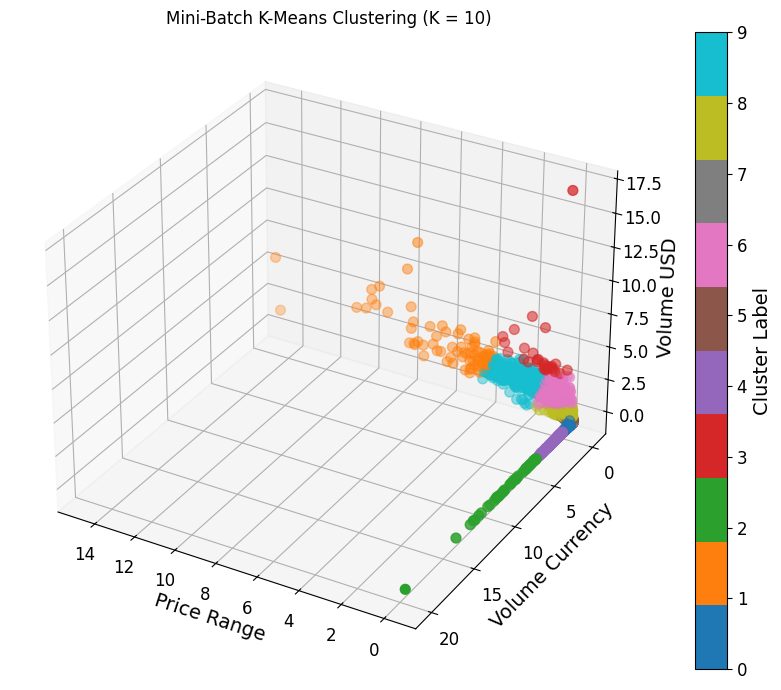

In [265]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Extract feature values
x = X_test_scaled["Price Range"]
y = X_test_scaled["Volume Currency"]
z = X_test_scaled["Volume USD"]

# Plot the points colored by cluster
sc = ax.scatter(x, y, z, c=mbkMeans_predictions, cmap='tab10', s=50)

# Set labels
ax.set_title("Mini-Batch K-Means Clustering (K = 10)")
ax.set_xlabel("Price Range")
ax.set_ylabel("Volume Currency")
ax.set_zlabel("Volume USD")
plt.colorbar(sc, label="Cluster Label")

# Change viewing angle here
ax.view_init(elev=30, azim=120)

save_fig("mbkMeans_Clustering_Predictions") 
plt.show()

### Hierachical Density-Based Spatial Clustering of Applications with Noise (HDBSCAN)

In [266]:
# Reading in HDBSCAN model
hdbscan_model = pickle.load(open('finalized_model_M4.sav', 'rb'))
hdbscan_labels = hdbscan_model.labels_

Saving figure hdbscan_Predictions


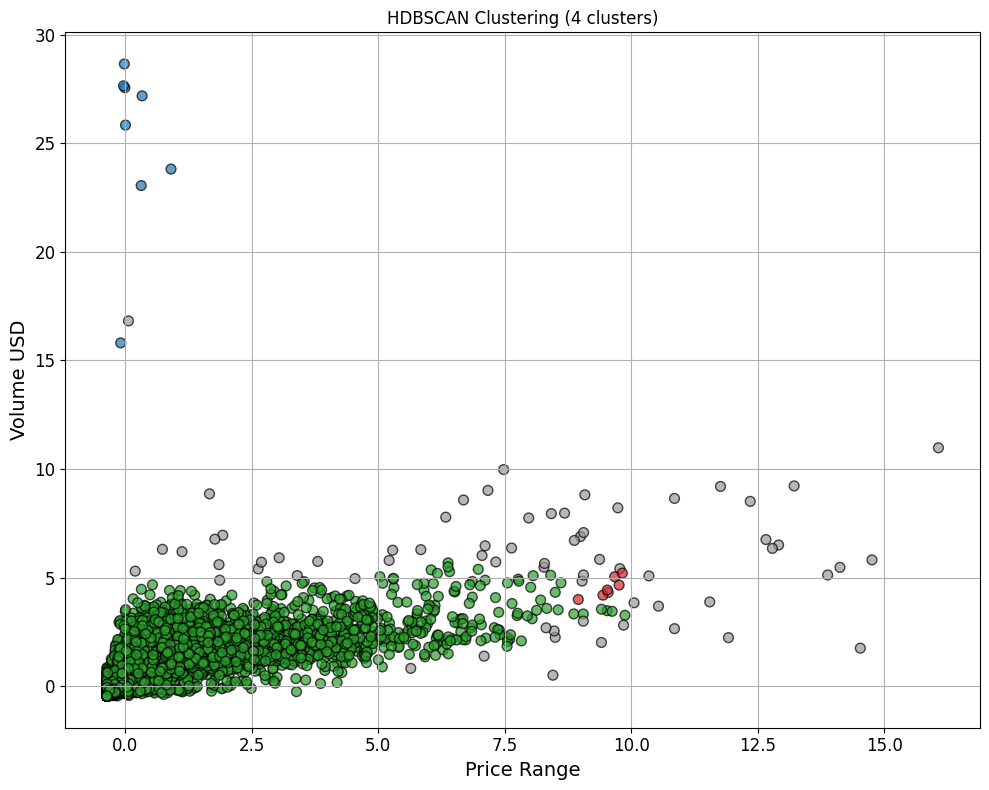

In [267]:
import seaborn as sns

# Extract features for plotting
x = crypto_data_scaled["Price Range"]
y = crypto_data_scaled["Volume USD"]

# Get HDBSCAN cluster labels
unique_labels = set(hdbscan_labels)

# Prepare color palette
n_clusters = len(unique_labels) - (1 if -1 in hdbscan_labels else 0)
palette = sns.color_palette("tab10", n_colors=max(n_clusters, 1))

# Assign colors to each label
colors = [palette[label] if label != -1 else (0.6, 0.6, 0.6) for label in hdbscan_labels]

# Create scatter plots
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c=colors, s=50, alpha=0.7, edgecolor='k')

plt.xlabel("Price Range")
plt.ylabel("Volume USD")
plt.title(f"HDBSCAN Clustering ({n_clusters} clusters)")
plt.grid(True)
plt.tight_layout()
save_fig("hdbscan_Predictions") 
plt.show()


### Observations
In observing the visualization of the 3 clustering models, K-Means Clustering is shown to be the best at creating clusters around the outlier data. For instance, intentional market manipulation can be identified by drastic shifts in the price range or high volumes of trading, which K-Means was able to capture best on clusters 2, 5, and 7.

Mini-batch K-Means, while similar to the results in normal K-Means, suffers some inaccurate clustering as it trains with mini-batches rather than the whole dataset. 

HDBSCAN, while successful in identifying the highly dense normal market activity cluster, gets somewhat confused by general noise and market manipulation outliers.

## Evaluation (Scores)

- Silhouette Score -  Computes the mean Silhouette Coefficient of all samples, which indicates the amount of overlapping between clusters. Higher score denotes better clustering.
- Davies-Bouldin Score - Computes the average similarity measure of each cluster with its most similar cluster. Higher score denotes better clustering as clusters are farther apart and less disperse.
- Calinski-Harabasz Score - Computers the ratio of the sum of between-cluster dispersion and of within-cluster dispersion. Higher score denotes better clustering as cluster are well dispersed between each other and data within the clusters are well dispersed.

In [268]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# General-purpose evaluation for clustering models
def unsupervised_evaluate_model(data, labels):
    return {
        'Silhouette Score': silhouette_score(data, labels),
        'Davies-Bouldin Score': davies_bouldin_score(data, labels),
        'Calinski-Harabasz Score': calinski_harabasz_score(data, labels),
    }

# Evaluate all models
kMeans_metrics = unsupervised_evaluate_model(X_test_scaled, kMeans_predictions)
mbkMeans_metrics = unsupervised_evaluate_model(X_test_scaled, mbkMeans_predictions)
hdbscan_metrics = unsupervised_evaluate_model(crypto_data_scaled, hdbscan_labels)

# Collect into DataFrame
unsupervised_metrics_df = pd.DataFrame([kMeans_metrics, mbkMeans_metrics, hdbscan_metrics], index=["K-Means", "Mini-Batch K-Means", "HDBSCAN"])

unsupervised_metrics_df


,Silhouette Score,Davies-Bouldin Score,Calinski-Harabasz Score
K-Means,0.670322,0.606341,6145.365635
Mini-Batch K-Means,0.542908,0.737068,4011.814277
HDBSCAN,0.853952,1.172779,1430.110389


### Observation
According to the scores, HDBSCAN performs the best by scoring the highest on the sihouette score and Davis-Bouldin score, but scoring the lowest on the Calinski-Harabasz score. In addition, K-Means scored the highest on the Calinski-Harabasz score.

Therefore, K-Means clustering and HDBSCAN are both effective options for unsupervised clustering for detecting abnormal market behavior.

# Supervised Modeling
Evaluation metrics comparing the ability of the supervised models at classifying intention market manipulation.

### ML Techniques used:
- Logistic Regression
- Naive Bayes with feature selection

In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif

# Load dataset
df = pd.read_csv("processed_crypto_data_with_labels.csv")

# Feature engineering
df['datetime'] = pd.to_datetime(df['Unix Timestamp'], unit='s')
df['hour'] = df['datetime'].dt.hour
df['is_day'] = df['hour'].apply(lambda h: 1 if 7 <= h < 19 else 0)

X = df[['Volume Currency', 'Volume USD', 'Price Range', 'is_day']]
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [270]:
# Full model: Logistic Regression
model_full = LogisticRegression(max_iter=1000)
model_full.fit(X_train, y_train)
y_pred_full = model_full.predict(X_test)
proba_full = model_full.predict_proba(X_test)[:, 1]

# Reduced model: Naive Bayes
selector = SelectKBest(score_func=f_classif, k=3)
X_train_reduced = selector.fit_transform(X_train, y_train)
X_test_reduced = selector.transform(X_test)
model_reduced = GaussianNB()
model_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = model_reduced.predict(X_test_reduced)
proba_reduced = model_reduced.predict_proba(X_test_reduced)[:, 1]

In [271]:
# Metrics
def evaluate_model(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1 Score': f1_score(y_true, y_pred, zero_division=0)
    }

metrics_full = evaluate_model(y_test, y_pred_full)
metrics_reduced = evaluate_model(y_test, y_pred_reduced)
metrics_df = pd.DataFrame([metrics_full, metrics_reduced], index=["Logistic Regression", "Naive Bayes"])
metrics_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.976490,0.879213,0.780549,0.826948
Naive Bayes,0.710517,0.199106,1.000000,0.332091


Saving figure Confusion_Matrix


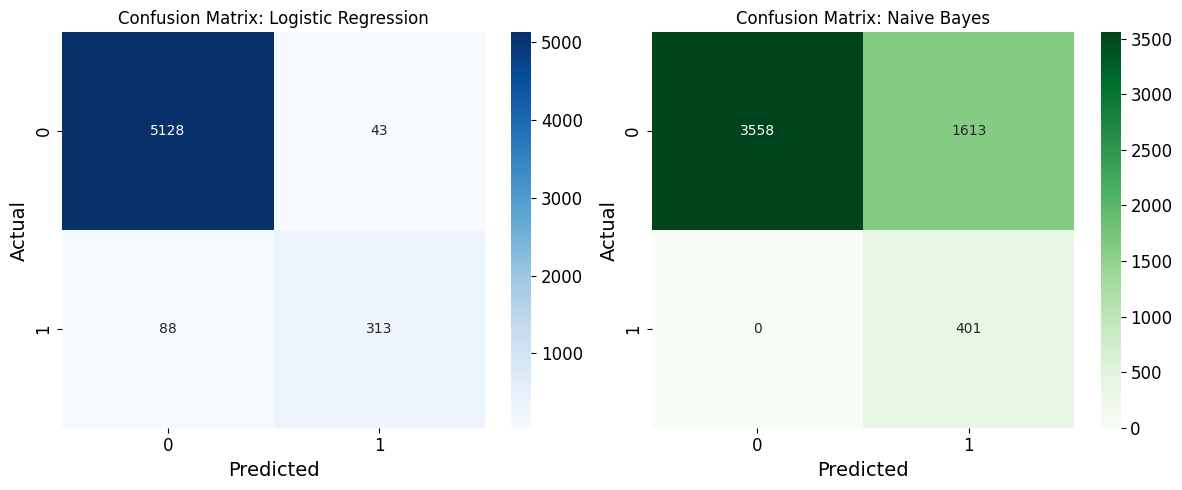

In [272]:
# Plot confusion matrices
conf_matrix_full = confusion_matrix(y_test, y_pred_full)
conf_matrix_reduced = confusion_matrix(y_test, y_pred_reduced)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_full, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted'); plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_reduced, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix: Naive Bayes')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.tight_layout()
save_fig("Confusion_Matrix") 
plt.show()

Saving figure ROC_Curve


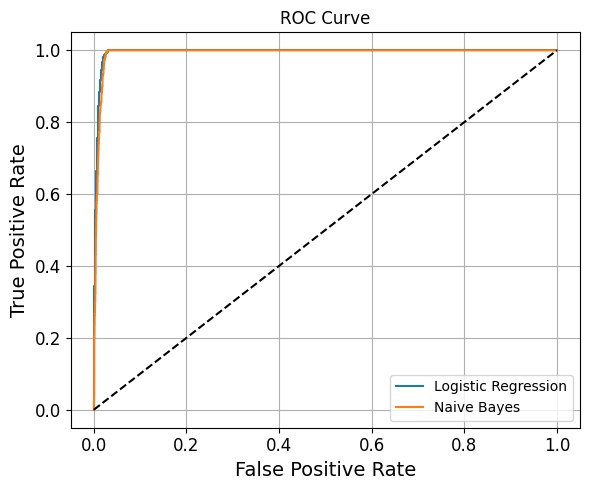

In [273]:
# Plot ROC Curves
fpr_full, tpr_full, _ = roc_curve(y_test, proba_full)
fpr_reduced, tpr_reduced, _ = roc_curve(y_test, proba_reduced)

plt.figure(figsize=(6, 5))
plt.plot(fpr_full, tpr_full, label='Logistic Regression')
plt.plot(fpr_reduced, tpr_reduced, label='Naive Bayes')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
save_fig("ROC_Curve") 
plt.show()

Saving figure Bar_Metric_Comparison


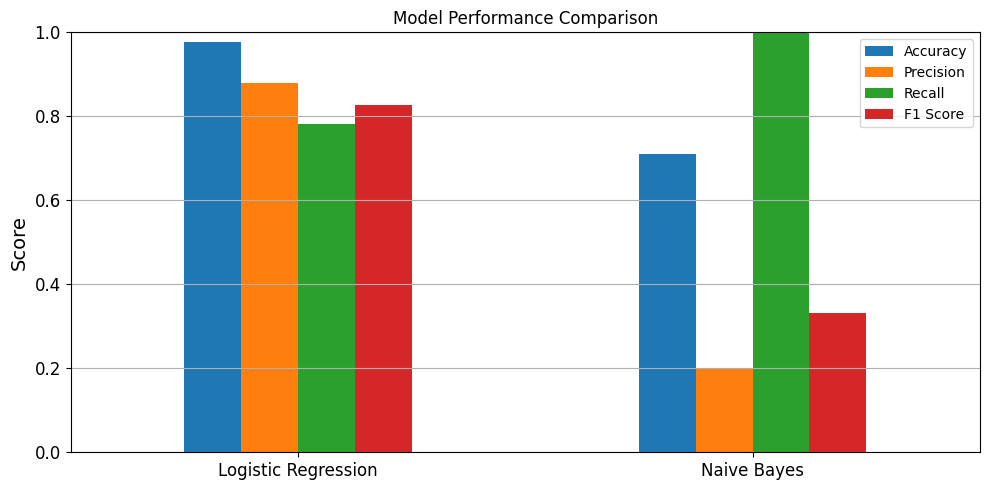

In [274]:
# Bar chart of metric comparison
metrics_df.plot(kind='bar', figsize=(10, 5))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
save_fig("Bar_Metric_Comparison") 
plt.show()

## Overall Observations
In observing the evaluation metrics between supervised and unsupervised learning, supervised learning provides the most accurate predictions when the market manipulation label is encoded according to a rule we proposed. However, in a realistic situation where the actual label is unknown, the unsupervised learning does well to cluster irregular behavior away from normal market behavior.